<a href="https://colab.research.google.com/github/Animesh-Guchhait/Expriment-on-CNN-and-DNN-regarding-visual-information/blob/main/CNN_%26_DNN_on_two_data_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libaries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy

# this 'device' will be used for training our model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# DNN and CNN on Fashin MNIST data set

In [ ]:
# Load fashion mnist data set
input_size  = 28*28   # images are 28x28 pixels
output_size = 10      # there are 10 classes

train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=1000, shuffle=True)

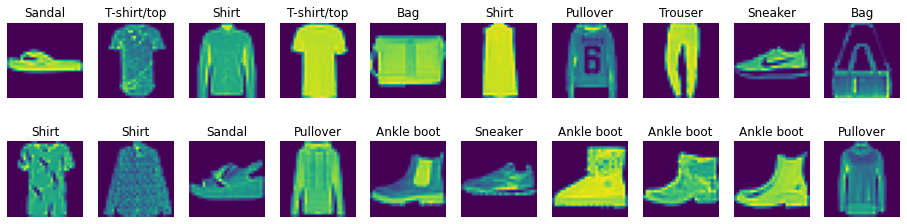

In [ ]:
# show some training images
plt.figure(figsize=(16, 4))

# fetch a batch of train images; RANDOM
image_batch, label_batch = next(iter(train_loader))
classNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
for i in range(20):
    image = image_batch[i]
    label = label_batch[i].item()
    plt.subplot(2, 10, i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off')
    plt.title(classNames[label])

Necessary functions

In [ ]:
# function to count number of parameters
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

accuracy_list = []
# we pass a model object to this trainer, and it trains this model for one epoch
def train(epoch, model):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(model):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)
        
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

In [ ]:
# Implementing DNN
class FC2Layer(nn.Module):
    def __init__(self, input_size, output_size):
        super(FC2Layer, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, 200), 
            nn.ReLU(),
            nn.Linear(200,100),
            nn.ReLU(),
            nn.Linear(100,60), 
            nn.ReLU(), 
            nn.Linear(60, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

In [ ]:
# Training Fashion MNIST dataset
print("Training on ", device)
model_fnn = FC2Layer(input_size, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 10):
    train(epoch, model_fnn)
    test(model_fnn)

Training on  cpu
Number of parameters: 183770
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.308530
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.604872
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.999172
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.790799
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.924643
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.719853
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.780915
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.563913
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.761948
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.429024

Test set: Average loss: 0.5402, Accuracy: 8030/10000 (80%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.486884
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.345403
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.453118
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.496082
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.269291
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.372129
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.382741
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.411892
Train

Accuracy is 88% on test data

Some prediction on test data

In [ ]:
def visualize_pred(img, pred_prob, real_label):
    ''' Function for viewing an image and it's predicted classes.
    '''
    #pred_prob = pred_prob.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.numpy().squeeze())
    #imshow(img, ax1)
    ax1.axis('off')
    pred_label = numpy.argmax(pred_prob)
    ax1.set_title([classNames[real_label], classNames[pred_label]])
    
    ax2.barh(numpy.arange(10), pred_prob)
    ax2.set_aspect(0.1)
    ax2.set_yticks(numpy.arange(10))
    ax2.set_yticklabels(classNames)
    ax2.set_title('Prediction Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

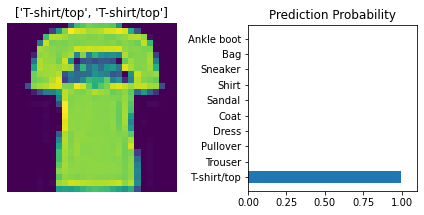

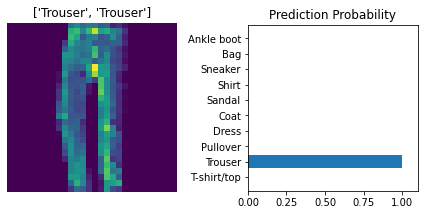

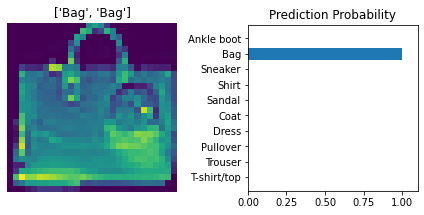

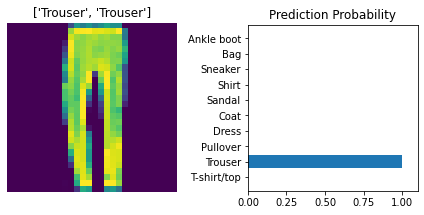

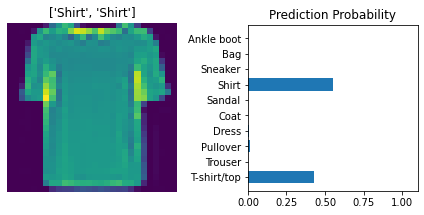

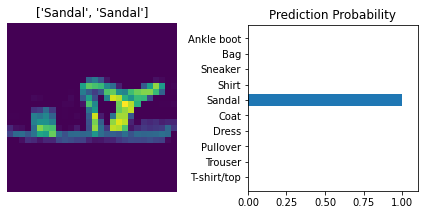

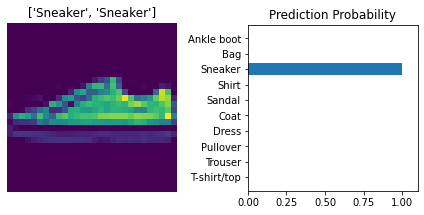

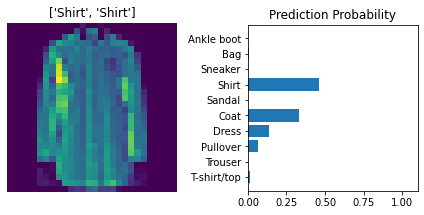

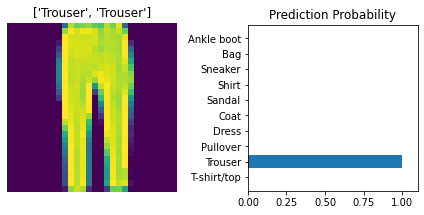

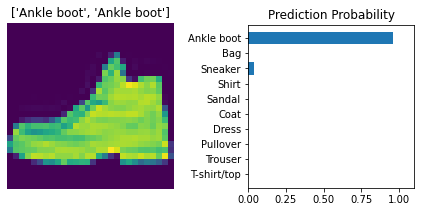

In [ ]:

model_fnn.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_fnn(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

DNN with Dropout

In [ ]:
class FC2LayerDropout(nn.Module):
    def __init__(self, input_size, output_size):
        super(FC2LayerDropout, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, 200),
            nn.Dropout(0.20),
            nn.ReLU(), 
            nn.Linear(200, 100),
            nn.Dropout(0.20),
            nn.ReLU(), 
            nn.Linear(100,60),
            nn.ReLU(),
            nn.Linear(60, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

In [ ]:
# Training on Fashion MNIST data using DNN with dropout
print("Training on ", device)
model = FC2LayerDropout(input_size, output_size)
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model)))

for epoch in range(0, 10):
    model.train() # model in training mode. Turns on dropout, batch-norm etc during training
    train(epoch, model)
    model.eval() # model in evaluation mode. Turn off dropout, batch-norm etc during validation/testing
    test(model)

Training on  cpu
Number of parameters: 183770
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.319279
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.741178
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.994038
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.945543
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.687864
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.924509
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.708366
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.517051
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.905123
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.543523

Test set: Average loss: 0.5638, Accuracy: 7893/10000 (79%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.948197
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.702359
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.580923
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.348356
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.459768
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.560714
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.520567
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.483208
Train

For DNN with dropout we got 88% accuracy on test data 

Some visual prediction on test data

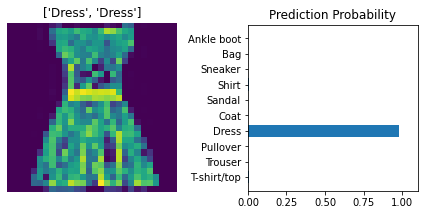

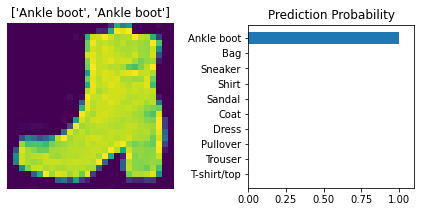

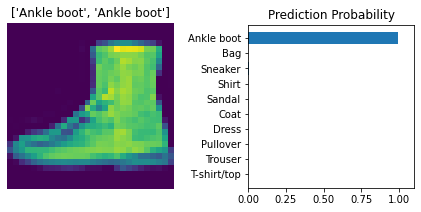

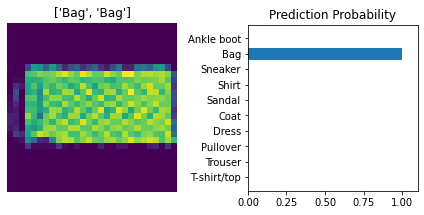

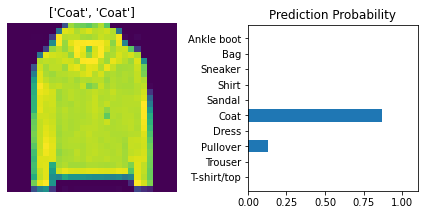

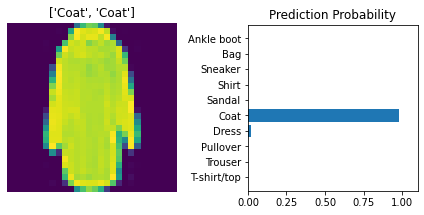

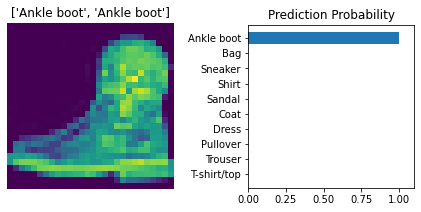

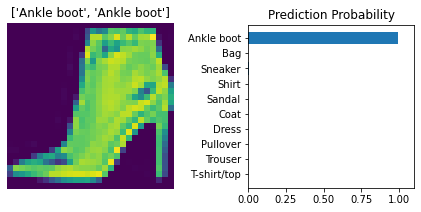

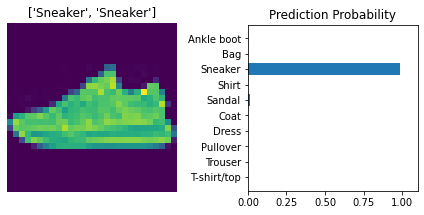

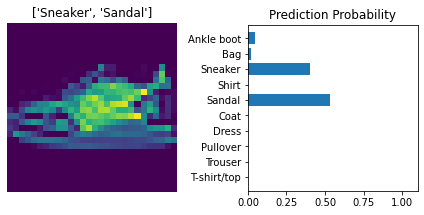

In [ ]:
model.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

Defining CNN 

In [ ]:

class CNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=0)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=6, padding=0)
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=6, padding=0)
        self.fc1 = nn.Linear(16*2*2, 200)
        self.fc2 = nn.Linear(200, 10)
        
    def forward(self, x, verbose=False):
        #print("input", x.shape)
        
        x = self.conv1(x)      
        x = F.relu(x)
        #print("after conv1", x.shape)
        
        x = self.conv2(x)       
        x = F.relu(x)
        #print("after conv2", x.shape)
        
        x = F.max_pool2d(x, kernel_size=2)
        #print("after 1st maxpool", x.shape)
        
        x = self.conv3(x)
        x = F.relu(x)
        #print("after conv3", x.shape)
        
        x = F.max_pool2d(x, kernel_size=2)
        #print("after 2nd maxpool", x.shape)
        
        x = x.view(-1, 16*2*2)
        #print("after tensor shape change", x.shape)
        
        x = self.fc1(x)
        x = F.relu(x)
        #print("after fc1", x.shape)
        
        x = self.fc2(x)
        #print("after fc2", x.shape)
        
        x = F.log_softmax(x, dim=1)
        return x

In [ ]:
# Training with CNN
print("Training on ", device)
model_cnn = CNN(input_size, output_size)
model_cnn.to(device)
optimizer = optim.SGD(model_cnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_cnn)))

for epoch in range(0, 10):
    train(epoch, model_cnn)
    test(model_cnn)

Training on  cpu
Number of parameters: 20834
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.306683
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.282359
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.267051
Train Epoch: 0 [19200/60000 (32%)]	Loss: 2.002657
Train Epoch: 0 [25600/60000 (43%)]	Loss: 1.358342
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.929854
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.852994
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.742194
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.532225
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.609257

Test set: Average loss: 0.6790, Accuracy: 7529/10000 (75%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.470226
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.609156
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.409440
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.688007
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.515201
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.568163
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.398856
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.489874
Train 

We got 87% accuracy using CNN

Some visual prediction

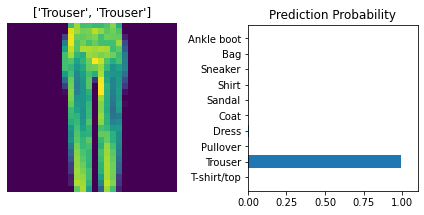

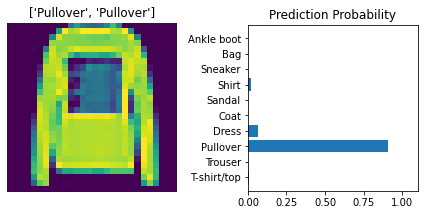

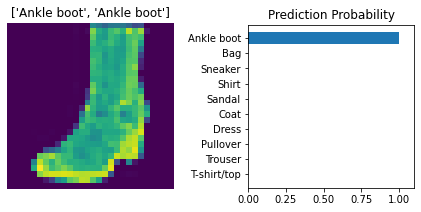

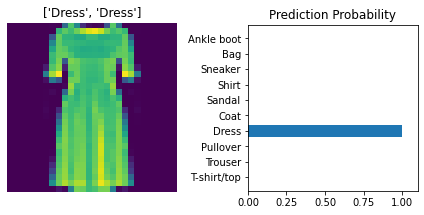

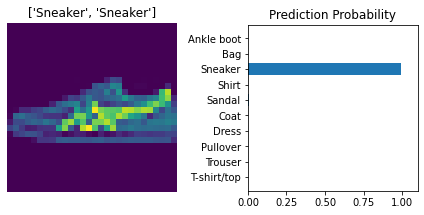

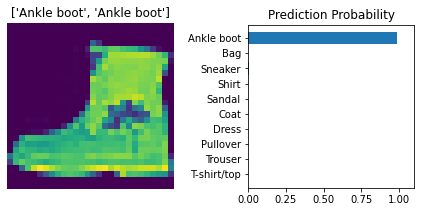

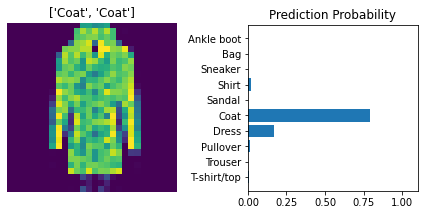

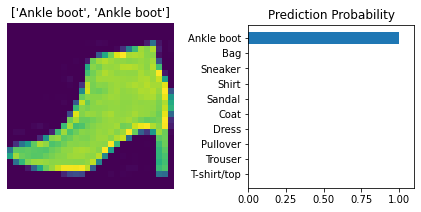

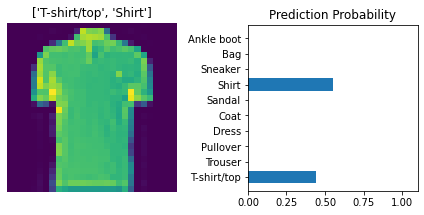

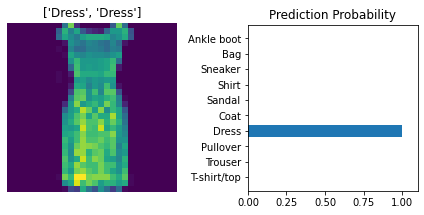

In [ ]:
model_cnn.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_cnn(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

 Now To check if CNN and DNN use visual information or not:

Permuted the image pixels to destroy the visual information

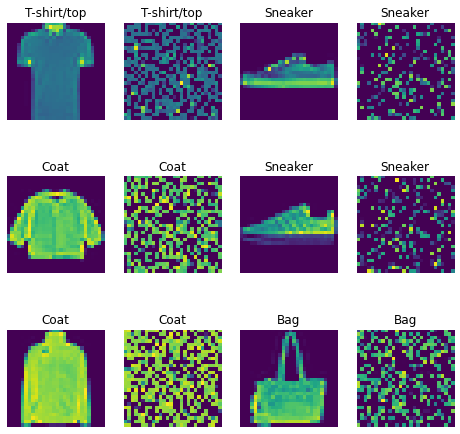

In [ ]:
fixed_perm = torch.randperm(784) # Fix a permutation of the image pixels; We apply the same permutation to all images

# show some training images
plt.figure(figsize=(8, 8))

# fetch a batch of train images; RANDOM
image_batch, label_batch = next(iter(train_loader))

for i in range(6):
    image = image_batch[i]
    image_perm = image.view(-1, 28*28).clone()
    image_perm = image_perm[:, fixed_perm]
    image_perm = image_perm.view(-1, 1, 28, 28)
    
    label = label_batch[i].item()
    plt.subplot(3,4 , 2*i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off')
    plt.title(classNames[label])
    plt.subplot(3, 4, 2*i+2)
    plt.imshow(image_perm.squeeze().numpy())
    plt.axis('off')
    plt.title(classNames[label])

In [ ]:
#Scrambling the train test data
accuracy_list = []

def scramble_train(epoch, model, perm=torch.arange(0, 784).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def scramble_test(model, perm=torch.arange(0, 784).long()):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)
        
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

Training the CNN with scrambled train data set

In [ ]:
print("Training on ", device)
model_fnn_2 = FC2Layer(input_size, output_size)
model_fnn_2.to(device)
optimizer = optim.SGD(model_fnn_2.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_fnn_2)))

for epoch in range(0, 10):
    scramble_train(epoch, model_fnn_2, fixed_perm)
    scramble_test(model_fnn_2, fixed_perm)

Training on  cpu
Number of parameters: 183770
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.300137
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.781680
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.953972
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.850414
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.613914
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.530796
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.635029
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.524978
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.760485
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.537533

Test set: Average loss: 0.5443, Accuracy: 8049/10000 (80%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.380207
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.549801
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.272428
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.355610
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.409040
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.513454
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.483356
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.397087
Train

Some visual predictions

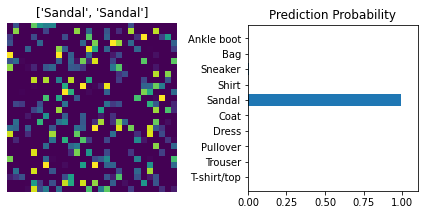

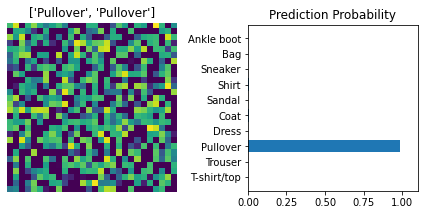

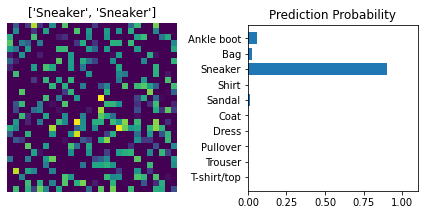

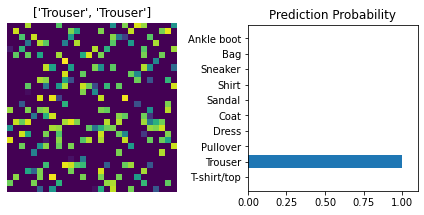

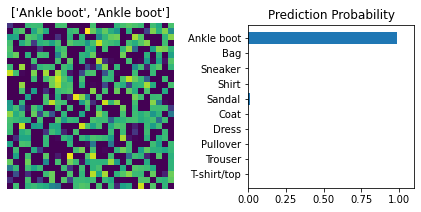

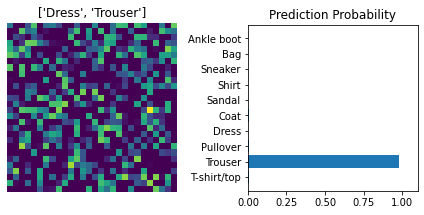

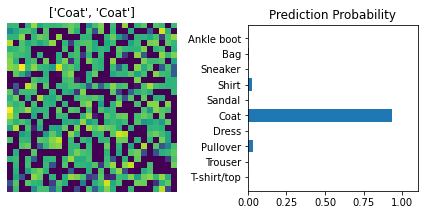

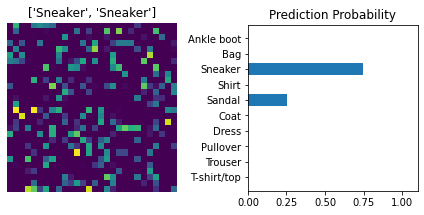

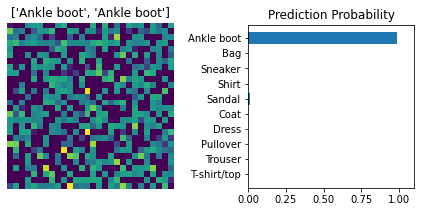

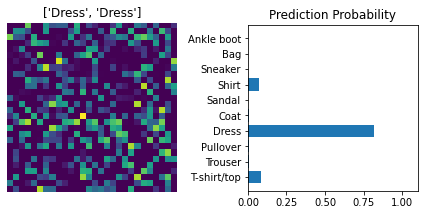

In [ ]:
model_fnn_2.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))
image_batch_scramble = image_batch.view(-1, 28*28)
image_batch_scramble = image_batch_scramble[:, fixed_perm]
image_batch_scramble = image_batch_scramble.view(-1, 1, 28, 28)
# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_fnn_2(image_batch_scramble)
for i in range(10):
    img = image_batch[i]
    img_perm = image_batch_scramble[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img_perm, pred_prob, real_label)

We got 87% accuracy with scrambled dataset also.So, accuracy did not reduced that much.So, We can say that DNN is not using visual information for this data set.

Now to train CNN with this scrambled data

In [ ]:
print("Training on ", device)
model_CNN_2 = CNN(input_size, output_size)
model_CNN_2.to(device)
optimizer = optim.SGD(model_CNN_2.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_CNN_2)))

for epoch in range(0, 10):
    scramble_train(epoch, model_CNN_2, fixed_perm)
    scramble_test(model_CNN_2, fixed_perm)

Training on  cpu
Number of parameters: 20834
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.301269
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.289076
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.263408
Train Epoch: 0 [19200/60000 (32%)]	Loss: 2.149917
Train Epoch: 0 [25600/60000 (43%)]	Loss: 1.532384
Train Epoch: 0 [32000/60000 (53%)]	Loss: 1.046829
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.922851
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.626576
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.777906
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.842815

Test set: Average loss: 0.6304, Accuracy: 7798/10000 (78%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.662948
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.526153
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.789246
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.464536
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.694671
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.582218
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.513874
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.388946
Train 

Some visual predictions

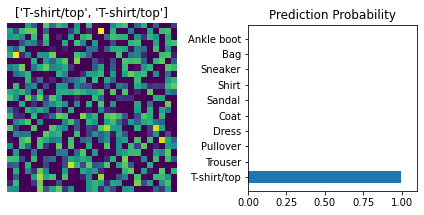

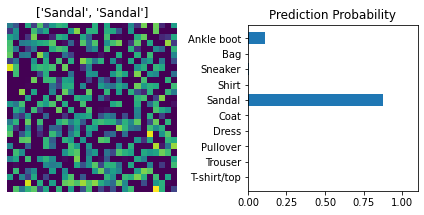

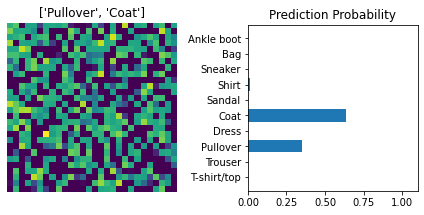

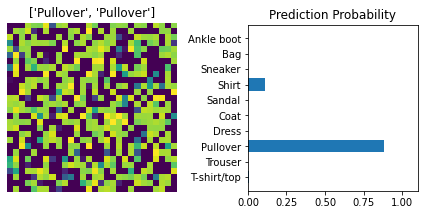

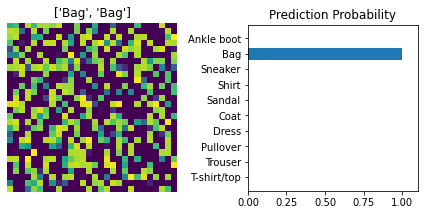

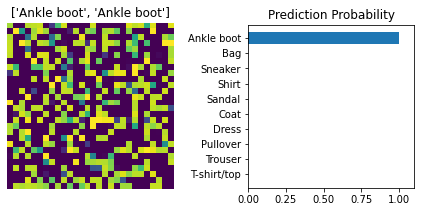

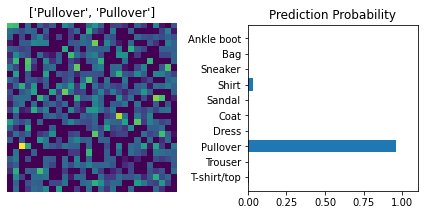

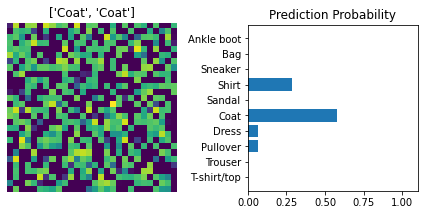

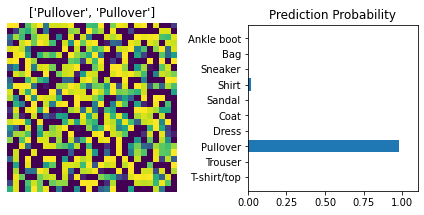

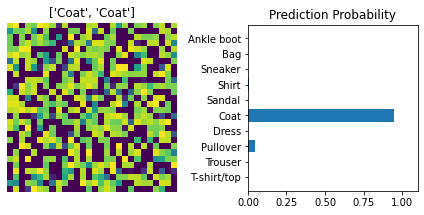

In [ ]:
model_CNN_2.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))
image_batch_scramble = image_batch.view(-1, 28*28)
image_batch_scramble = image_batch_scramble[:, fixed_perm]
image_batch_scramble = image_batch_scramble.view(-1, 1, 28, 28)
# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_CNN_2(image_batch_scramble)
for i in range(10):
    img = image_batch[i]
    img_perm = image_batch_scramble[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img_perm, pred_prob, real_label)

We got 85% accuracy with scrambled dataset .So, accuracy reduced by 2%. So, may be CNN uses visual information.

Next for The Sign Language digit dataset

# The Sign Language digit dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load SignLanguageDigitDataset

In [ ]:
class SignLanguageDigitsDataset(Dataset):

    def __init__(self):
        self.x = torch.from_numpy(numpy.load('/content/drive/MyDrive/AML assignments/X.npy'))
        self.y = torch.from_numpy(numpy.load('/content/drive/MyDrive/AML assignments/Y.npy'))

        self.x = self.x.unsqueeze(1)
        self.y = torch.argmax(self.y, dim=1)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)

In [ ]:
dataset = SignLanguageDigitsDataset()
len(dataset)

2062

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.15)

print(len(train_set))
print(len(test_set))

1752
310


In [ ]:
train_loader = DataLoader(dataset=train_set, batch_size=2, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=10, shuffle=True)

data_iter = iter(train_loader)
images, labels = data_iter.next()

print(images.shape)
print(labels.shape)

torch.Size([2, 1, 64, 64])
torch.Size([2])


In [ ]:
input_size  = 64*64  # images are 28x28 pixels
output_size = 10 

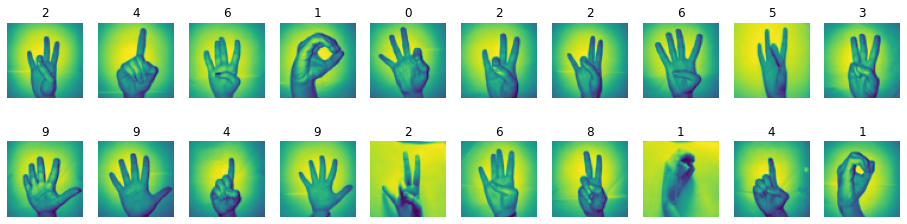

In [ ]:
# show some training images
plt.figure(figsize=(16, 4))

# fetch a batch of train images; RANDOM
image_batch, label_batch = next(iter(train_loader))
t=0
image=[]
label=[]
for j in range(10):
  image_batch, label_batch = next(iter(train_loader))
  for i in range(2):
    image.append(image_batch[i])
    label.append(label_batch[i].item())
for i in range(len(image)):
    plt.subplot(2, 10, i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image[i].squeeze().numpy())
    plt.axis('off')
    plt.title(label[i])
      

Some necessary functions

In [ ]:
# function to count number of parameters
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

accuracy_list = []
# we pass a model object to this trainer, and it trains this model for one epoch
def train(epoch, model):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(model):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)
        
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

In [ ]:
def visualize_pred(img, pred_prob, real_label):
    ''' Function for viewing an image and it's predicted classes.
    '''
    #pred_prob = pred_prob.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.numpy().squeeze())
    ax1.axis('off')
    pred_label = numpy.argmax(pred_prob)
    ax1.set_title([real_label, pred_label])
    
    ax2.barh(numpy.arange(10), pred_prob)
    ax2.set_aspect(0.1)
    ax2.set_yticks(numpy.arange(10))
    ax2.set_yticklabels(numpy.arange(10))
    ax2.set_title('Prediction Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

DNN network

In [ ]:
class FC2Layer(nn.Module):
    def __init__(self, input_size, output_size):
        super(FC2Layer, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size,1024), 
            nn.ReLU(),
            nn.Linear(1024,256), 
            nn.ReLU(),
            nn.Linear(256, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

Training DNN using train data

In [ ]:
print("Training on ", device)
model_fnn = FC2Layer(input_size, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(), lr=0.001, momentum=0.5)
#optimizer = optim.Adam(model_fnn.parameters(), lr=0.001, betas=(0.9, 0.999))
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 20):
    train(epoch, model_fnn)
    test(model_fnn)

Training on  cpu
Number of parameters: 4460298
Train Epoch: 0 [0/1752 (0%)]	Loss: 2.368494
Train Epoch: 0 [200/1752 (11%)]	Loss: 2.191503
Train Epoch: 0 [400/1752 (23%)]	Loss: 2.228963
Train Epoch: 0 [600/1752 (34%)]	Loss: 2.311375
Train Epoch: 0 [800/1752 (46%)]	Loss: 2.324037
Train Epoch: 0 [1000/1752 (57%)]	Loss: 2.335423
Train Epoch: 0 [1200/1752 (68%)]	Loss: 2.264639
Train Epoch: 0 [1400/1752 (80%)]	Loss: 2.300115
Train Epoch: 0 [1600/1752 (91%)]	Loss: 2.414876

Test set: Average loss: 2.2757, Accuracy: 48/310 (15%)

Train Epoch: 1 [0/1752 (0%)]	Loss: 2.302852
Train Epoch: 1 [200/1752 (11%)]	Loss: 2.467735
Train Epoch: 1 [400/1752 (23%)]	Loss: 2.231097
Train Epoch: 1 [600/1752 (34%)]	Loss: 2.294711
Train Epoch: 1 [800/1752 (46%)]	Loss: 2.254569
Train Epoch: 1 [1000/1752 (57%)]	Loss: 2.415631
Train Epoch: 1 [1200/1752 (68%)]	Loss: 2.152809
Train Epoch: 1 [1400/1752 (80%)]	Loss: 2.304996
Train Epoch: 1 [1600/1752 (91%)]	Loss: 2.401958

Test set: Average loss: 2.2397, Accuracy: 51/31

We got 69% of accuracy on test dataset

Some visual predictions

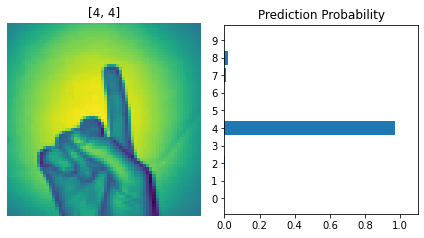

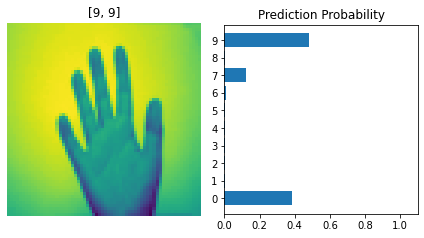

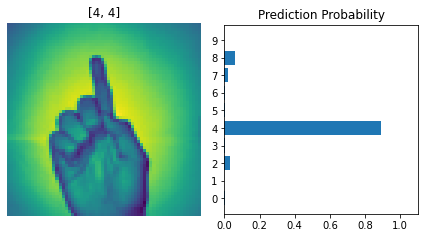

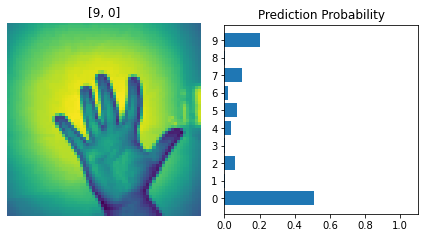

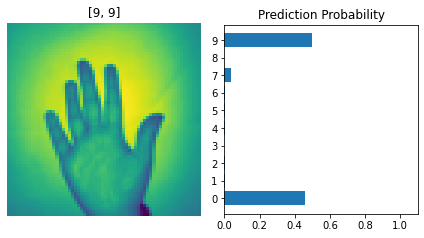

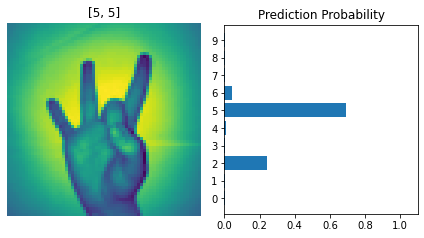

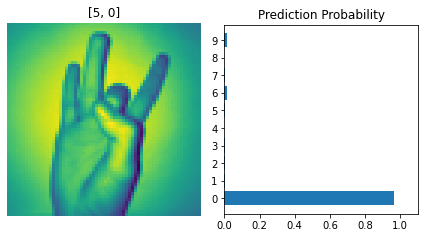

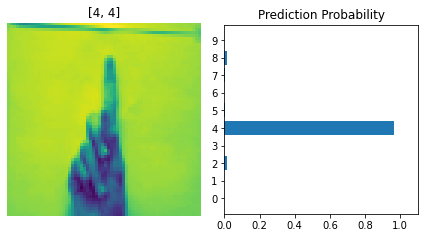

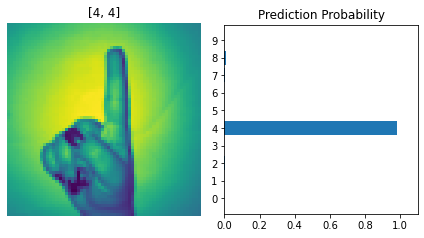

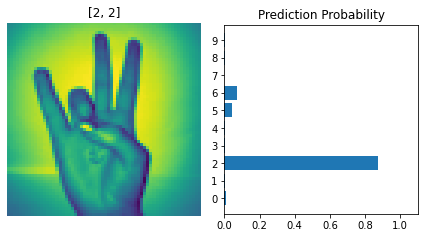

In [ ]:
model_fnn.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_fnn(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)


DNN network with dropout

In [ ]:
class FC2LayerDropout(nn.Module):
    def __init__(self, input_size, output_size):
        super(FC2LayerDropout, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size,1024),
            nn.Dropout(0.25), 
            nn.ReLU(),
            nn.Linear(1024,256), 
            nn.Dropout(0.25),
            nn.ReLU(),
            nn.Linear(256, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

In [ ]:
# Training the above DNN with dropout network
print("Training on ", device)
model_fnn = FC2LayerDropout(input_size, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(), lr=0.001, momentum=0.5)
#optimizer = optim.Adam(model_fnn.parameters(), lr=0.001, betas=(0.9, 0.999))
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 20):
    train(epoch, model_fnn)
    test(model_fnn)

Training on  cpu
Number of parameters: 4460298
Train Epoch: 0 [0/1752 (0%)]	Loss: 2.222519
Train Epoch: 0 [200/1752 (11%)]	Loss: 2.323859
Train Epoch: 0 [400/1752 (23%)]	Loss: 2.379777
Train Epoch: 0 [600/1752 (34%)]	Loss: 2.295901
Train Epoch: 0 [800/1752 (46%)]	Loss: 2.313653
Train Epoch: 0 [1000/1752 (57%)]	Loss: 2.322230
Train Epoch: 0 [1200/1752 (68%)]	Loss: 2.307758
Train Epoch: 0 [1400/1752 (80%)]	Loss: 2.401264
Train Epoch: 0 [1600/1752 (91%)]	Loss: 2.269696

Test set: Average loss: 2.2777, Accuracy: 38/310 (12%)

Train Epoch: 1 [0/1752 (0%)]	Loss: 2.334219
Train Epoch: 1 [200/1752 (11%)]	Loss: 2.480214
Train Epoch: 1 [400/1752 (23%)]	Loss: 2.315123
Train Epoch: 1 [600/1752 (34%)]	Loss: 2.349199
Train Epoch: 1 [800/1752 (46%)]	Loss: 2.344477
Train Epoch: 1 [1000/1752 (57%)]	Loss: 2.361862
Train Epoch: 1 [1200/1752 (68%)]	Loss: 2.347167
Train Epoch: 1 [1400/1752 (80%)]	Loss: 2.227684
Train Epoch: 1 [1600/1752 (91%)]	Loss: 2.258108

Test set: Average loss: 2.2563, Accuracy: 81/31

We got 65% accuracy on it.

Some visual predictions

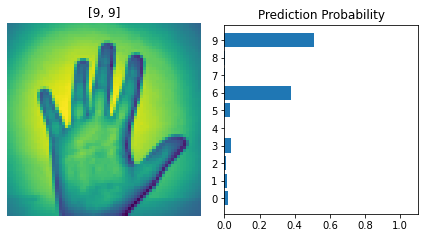

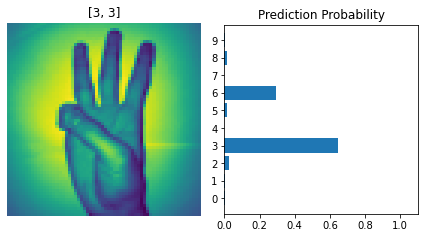

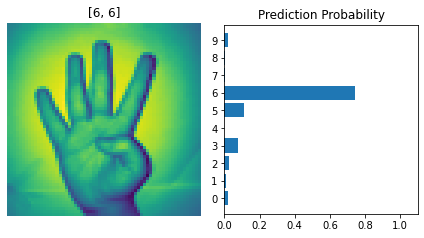

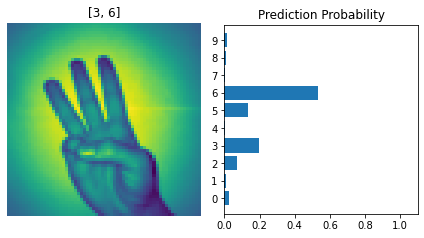

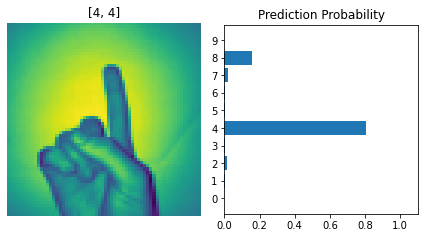

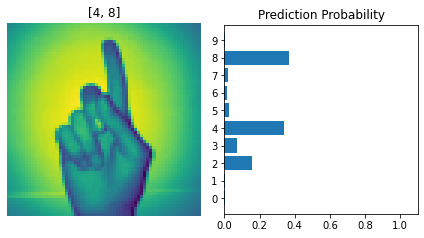

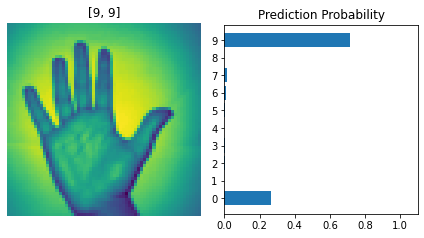

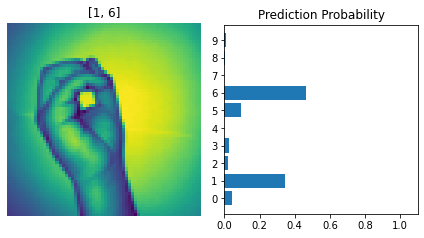

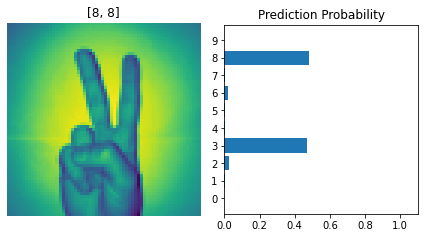

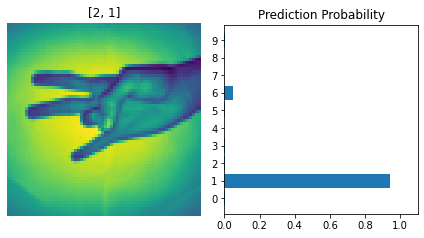

In [ ]:
model_fnn.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_fnn(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)


now CNN

In [ ]:
class CNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=0)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=6, padding=0)
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=6, padding=0)
        self.conv4 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=6, padding=0)
        self.fc1 = nn.Linear(32*3*3, 144)
        self.fc2 = nn.Linear(144, 10)
        
    def forward(self, x, verbose=False):
        #print("input", x.shape)
        
        x = self.conv1(x)      
        x = F.relu(x)
        #print("after conv1", x.shape)
        
        x = self.conv2(x)       
        x = F.relu(x)
        #print("after conv2", x.shape)
        
        x = F.max_pool2d(x, kernel_size=2)
        #print("after 1st maxpool", x.shape)
        
        x = self.conv3(x)
        x = F.relu(x)
        #print("after conv3", x.shape)
        
        x = F.max_pool2d(x, kernel_size=2)
        #print("after 2nd maxpool", x.shape)
        
        x = self.conv4(x)
        x = F.relu(x)
        #print("after conv4", x.shape)
        
        x = F.max_pool2d(x, kernel_size=2)
        #print("after 3nd maxpool", x.shape)

        x = x.view(-1, 32*3*3)
        #print("after tensor shape change", x.shape)
        
        x = self.fc1(x)
        x = F.relu(x)
        #print("after fc1", x.shape)
        
        x = self.fc2(x)
        #print("after fc2", x.shape)
        
        x = F.log_softmax(x, dim=1)
        return x

In [ ]:
# Training CNN network 
print("Training on ", device)
model_cnn = CNN(input_size, output_size)
model_cnn.to(device)
optimizer = optim.SGD(model_cnn.parameters(), lr=0.005, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_cnn)))

for epoch in range(0, 10):
    train(epoch, model_cnn)
    test(model_cnn)

Training on  cpu
Number of parameters: 67354
Train Epoch: 0 [0/1752 (0%)]	Loss: 2.364822
Train Epoch: 0 [200/1752 (11%)]	Loss: 2.292451
Train Epoch: 0 [400/1752 (23%)]	Loss: 2.326961
Train Epoch: 0 [600/1752 (34%)]	Loss: 2.348518
Train Epoch: 0 [800/1752 (46%)]	Loss: 2.313519
Train Epoch: 0 [1000/1752 (57%)]	Loss: 2.301326
Train Epoch: 0 [1200/1752 (68%)]	Loss: 2.302190
Train Epoch: 0 [1400/1752 (80%)]	Loss: 2.342079
Train Epoch: 0 [1600/1752 (91%)]	Loss: 2.304689

Test set: Average loss: 2.3025, Accuracy: 28/310 (9%)

Train Epoch: 1 [0/1752 (0%)]	Loss: 2.275225
Train Epoch: 1 [200/1752 (11%)]	Loss: 2.284369
Train Epoch: 1 [400/1752 (23%)]	Loss: 2.321227
Train Epoch: 1 [600/1752 (34%)]	Loss: 2.292647
Train Epoch: 1 [800/1752 (46%)]	Loss: 2.257113
Train Epoch: 1 [1000/1752 (57%)]	Loss: 2.263225
Train Epoch: 1 [1200/1752 (68%)]	Loss: 2.256368
Train Epoch: 1 [1400/1752 (80%)]	Loss: 2.310728
Train Epoch: 1 [1600/1752 (91%)]	Loss: 2.313324

Test set: Average loss: 2.3038, Accuracy: 25/310 (

The accuracy on CNN is 94%

some visual predictions

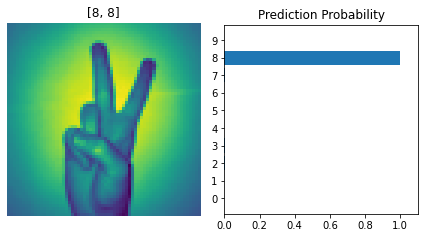

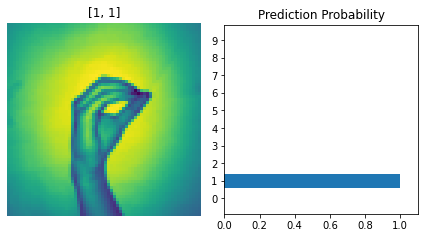

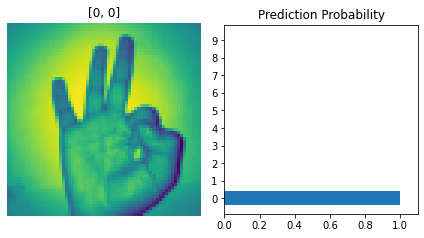

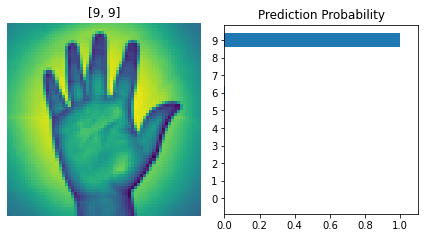

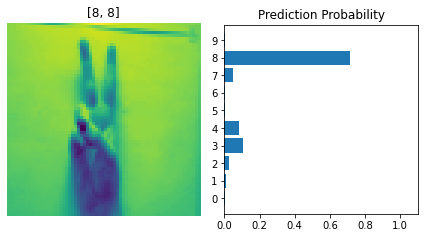

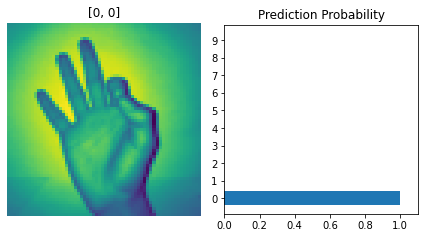

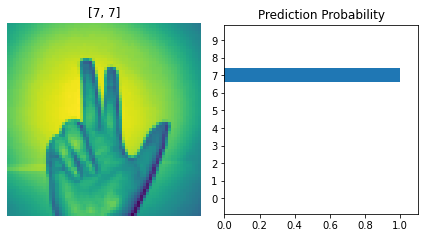

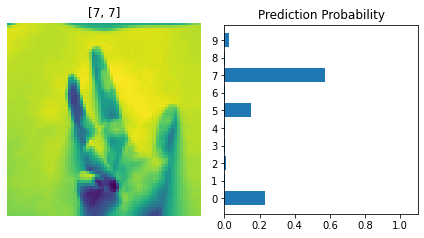

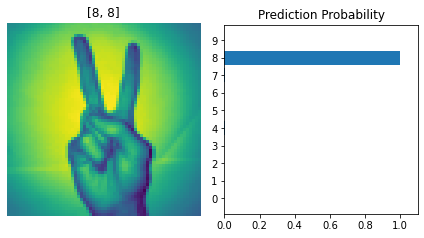

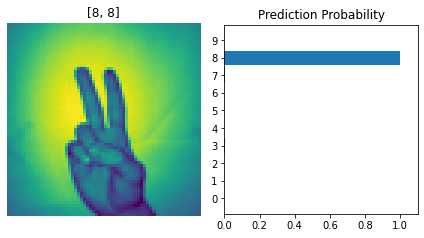

In [ ]:
model_cnn.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_cnn(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)


Now To check if CNN and DNN use visual informations or not

Now permuteded image pixels to destroy the visual informations

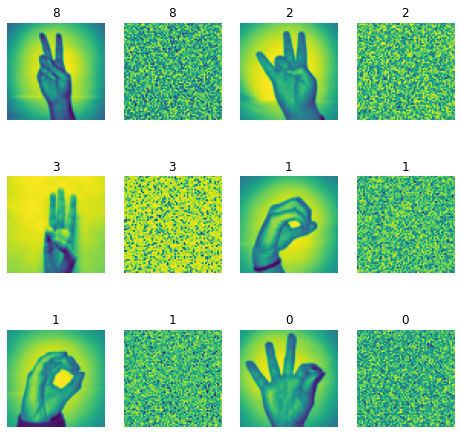

In [ ]:
fixed_perm = torch.randperm(4096) # Fix a permutation of the image pixels; We apply the same permutation to all images

# show some training images
plt.figure(figsize=(8, 8))

# fetch a batch of train images; RANDOM
image_batch, label_batch = next(iter(train_loader))
l=[]
m=[]
s=[]
for j in range(3):
  image_batch, label_batch = next(iter(train_loader))
  for i in range(2):
    image = image_batch[i]
    image_perm = image.view(-1, 64*64).clone()
    image_perm = image_perm[:, fixed_perm]
    image_perm = image_perm.view(-1, 1, 64, 64)
    l.append(image)
    m.append(image_perm)
    label = label_batch[i].item()
    s.append(label)
for i in range(len(l)):
    plt.subplot(3,4 , 2*i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(l[i].squeeze().numpy())
    plt.axis('off')
    plt.title(s[i])
    plt.subplot(3, 4, 2*i+2)
    plt.imshow(m[i].squeeze().numpy())
    plt.axis('off')
    plt.title(s[i])

In [ ]:
# Scrambleing train and test datasets
accuracy_list = []

def scramble_train(epoch, model, perm=torch.arange(0, 4096).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 64*64)
        data = data[:, perm]
        data = data.view(-1, 1, 64,64)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def scramble_test(model, perm=torch.arange(0, 4096).long()):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 64*64)
        data = data[:, perm]
        data = data.view(-1, 1, 64, 64)
        
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

In [ ]:
# Training DNN on scrambled train dataset
print("Training on ", device)
model_fnn2 = FC2Layer(input_size, output_size)
model_fnn2.to(device)
optimizer = optim.SGD(model_fnn2.parameters(), lr=0.001, momentum=0.5)
#optimizer = optim.Adam(model_fnn2.parameters(), lr=0.001, betas=(0.9, 0.999))
print('Number of parameters: {}'.format(get_n_params(model_fnn2)))

for epoch in range(0, 20):
    train(epoch, model_fnn2)
    test(model_fnn2)

Training on  cpu
Number of parameters: 4460298
Train Epoch: 0 [0/1752 (0%)]	Loss: 2.299588
Train Epoch: 0 [200/1752 (11%)]	Loss: 2.207613
Train Epoch: 0 [400/1752 (23%)]	Loss: 2.398339
Train Epoch: 0 [600/1752 (34%)]	Loss: 2.336234
Train Epoch: 0 [800/1752 (46%)]	Loss: 2.324613
Train Epoch: 0 [1000/1752 (57%)]	Loss: 2.354828
Train Epoch: 0 [1200/1752 (68%)]	Loss: 2.174164
Train Epoch: 0 [1400/1752 (80%)]	Loss: 2.327634
Train Epoch: 0 [1600/1752 (91%)]	Loss: 2.258400

Test set: Average loss: 2.2840, Accuracy: 26/310 (8%)

Train Epoch: 1 [0/1752 (0%)]	Loss: 2.269096
Train Epoch: 1 [200/1752 (11%)]	Loss: 2.309608
Train Epoch: 1 [400/1752 (23%)]	Loss: 2.280342
Train Epoch: 1 [600/1752 (34%)]	Loss: 2.204596
Train Epoch: 1 [800/1752 (46%)]	Loss: 2.247301
Train Epoch: 1 [1000/1752 (57%)]	Loss: 2.306558
Train Epoch: 1 [1200/1752 (68%)]	Loss: 2.274482
Train Epoch: 1 [1400/1752 (80%)]	Loss: 2.064512
Train Epoch: 1 [1600/1752 (91%)]	Loss: 2.643670

Test set: Average loss: 2.2307, Accuracy: 91/310

Here we get 74% accuracy which is even more than default dataset's accuracy . So, DNN is not using any visual information on this dataset.

some visual predictions

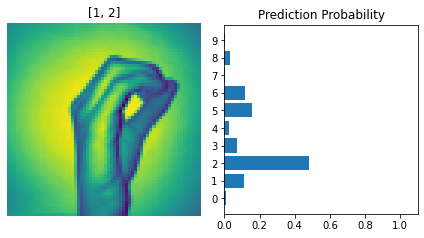

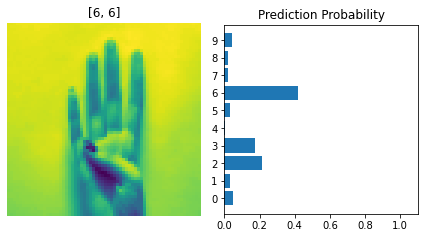

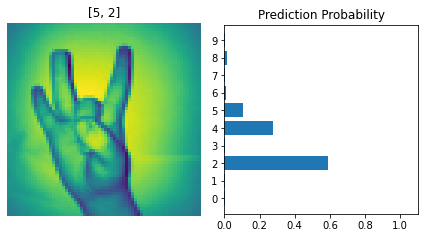

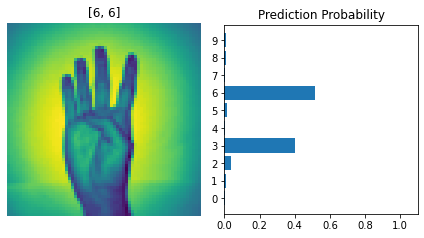

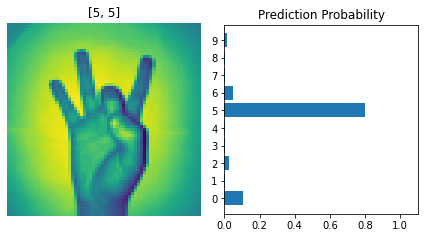

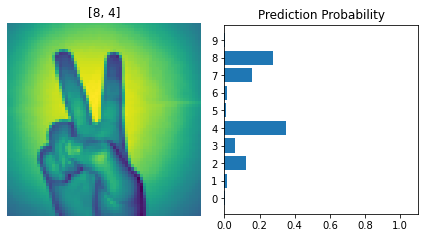

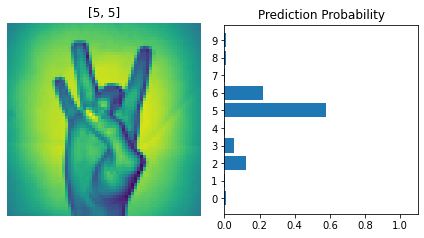

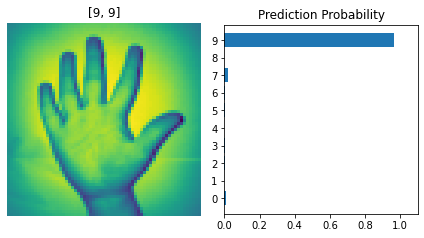

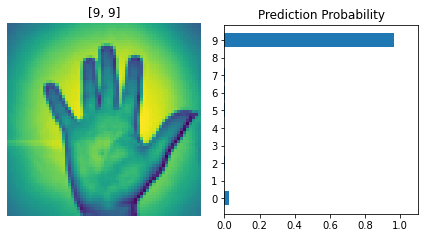

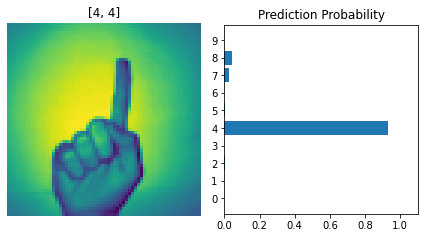

In [ ]:
model_fnn2.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_fnn2(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

In [ ]:
# Training CNN with scrambled train dataset
print("Training on ", device)
model_cnn_2 = CNN(input_size, output_size)
model_cnn_2.to(device)
optimizer = optim.SGD(model_cnn_2.parameters(), lr=0.005, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_cnn_2)))

for epoch in range(0, 10):
    scramble_train(epoch, model_cnn_2, fixed_perm)
    scramble_test(model_cnn_2, fixed_perm)

Training on  cpu
Number of parameters: 67354
Train Epoch: 0 [0/1752 (0%)]	Loss: 2.332654
Train Epoch: 0 [200/1752 (11%)]	Loss: 2.316158
Train Epoch: 0 [400/1752 (23%)]	Loss: 2.345707
Train Epoch: 0 [600/1752 (34%)]	Loss: 2.289710
Train Epoch: 0 [800/1752 (46%)]	Loss: 2.294528
Train Epoch: 0 [1000/1752 (57%)]	Loss: 2.303231
Train Epoch: 0 [1200/1752 (68%)]	Loss: 2.291828
Train Epoch: 0 [1400/1752 (80%)]	Loss: 2.301458
Train Epoch: 0 [1600/1752 (91%)]	Loss: 2.335227

Test set: Average loss: 2.3043, Accuracy: 25/310 (8%)

Train Epoch: 1 [0/1752 (0%)]	Loss: 2.296366
Train Epoch: 1 [200/1752 (11%)]	Loss: 2.302205
Train Epoch: 1 [400/1752 (23%)]	Loss: 2.270985
Train Epoch: 1 [600/1752 (34%)]	Loss: 2.307489
Train Epoch: 1 [800/1752 (46%)]	Loss: 2.352919
Train Epoch: 1 [1000/1752 (57%)]	Loss: 2.344733
Train Epoch: 1 [1200/1752 (68%)]	Loss: 2.332273
Train Epoch: 1 [1400/1752 (80%)]	Loss: 2.326141
Train Epoch: 1 [1600/1752 (91%)]	Loss: 2.311925

Test set: Average loss: 2.3051, Accuracy: 32/310 (

We get only 8% accuracy on scrambled dataset and we get 94% accuracy for default dataset. So, CNN is using visual information to predict.

Some visual predictions

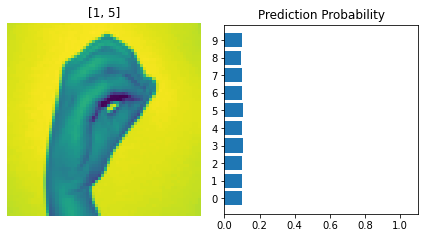

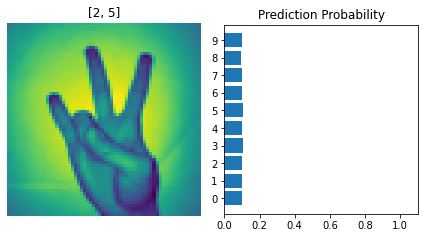

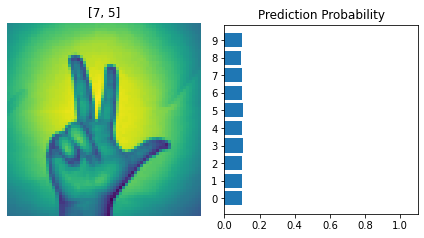

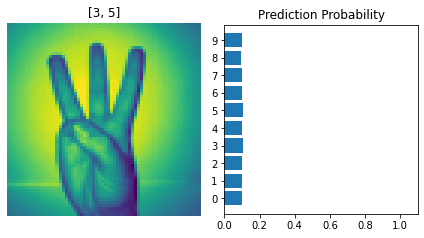

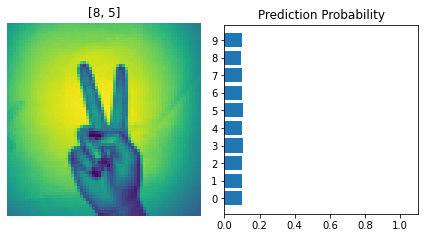

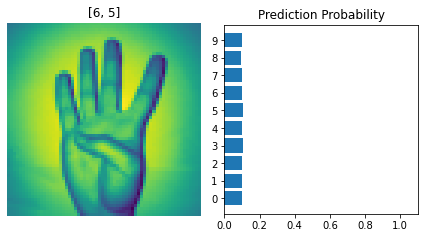

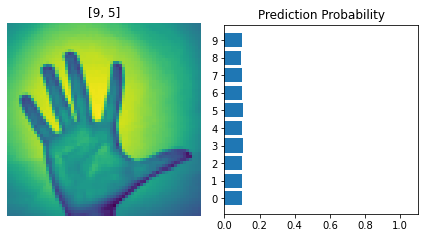

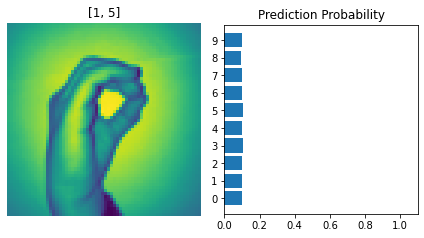

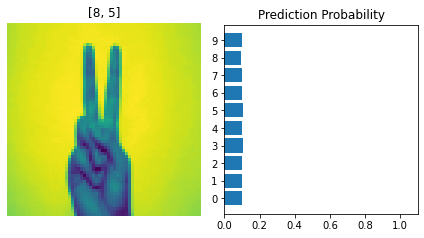

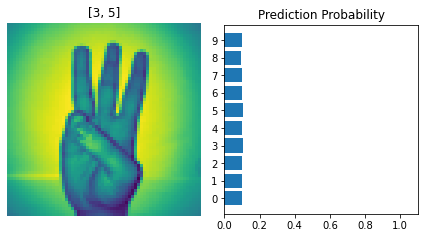

In [ ]:
model_cnn_2.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_cnn_2(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = label_batch[i].item()
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)